# Series de taylor

Primero debemos importar las librerias necesarias de la siguiente forma

In [1]:
from sympy import *  # Importamos todo de sympy
import matplotlib.pyplot as plt # Importamos matplotlib.pyplot como "ptl"
from IPython.display import display # Importamos de IPython.display la funcion display para hacer ver mejor la notación matematica
import numpy as np # Importamos numpy como "np"

Definimos las varibles necesarias para trabajar:
- derivadas: Una lista que nos ayudará a guardar las funciones que se irán derivando de la original
- x: Se le asigna una definición de simbolo para que pueda interpretar como una variable matemática
- y: Se le asigna el primer valor de nuestra función siendo f(x) 

In [2]:
derivadas = []
x, h = symbols('x,h')
y = 2*(x**3) - 2*(x**2) + 1
x0 = 1

Creamos una variable para almacenar la función de taylor y la imprimimos

In [3]:
taylor = series(y, x0=x0,  n=5).removeO()
print('La función de taylor es:')
display(taylor)

La función de taylor es:


2*x + 2*(x - 1)**3 + 4*(x - 1)**2 - 1

Imprimimos la función original y posteriormente creamos un loop de tipo while el cual irá derivando nuestra función hasta que esta valga 0 y la irá almecando en la lista "derivadas"

In [4]:
display('--------derivada: 0----------')
display(y)
derivadas.append(y)
limit = 1 
counter = 0
while(limit != 0):
    y = y.diff(x)
    derivadas.append(y)
    display('--------derivada: ' + str(counter + 1) +'----------')
    display(y)
    limit = y
    counter += 1

'--------derivada: 0----------'

2*x**3 - 2*x**2 + 1

'--------derivada: 1----------'

6*x**2 - 4*x

'--------derivada: 2----------'

12*x - 4

'--------derivada: 3----------'

12

'--------derivada: 4----------'

0

Obtenemos la definición de la serie de taylor quedando en: $f(x_i + 1)$ donde $h = (x-x_0)$

In [5]:
taylor_series = 0
for i in range(0, counter):
    taylor_series += (((derivadas[i].evalf(subs={x:x0}))/factorial(i))*h**i)
print('Nuestra función evaluada en xi + 1 es: ')
display(taylor_series)

Nuestra función evaluada en xi + 1 es: 


2.0*h**3 + 4.0*h**2 + 2.0*h + 1.0

Convertimos las funciones de sympy a funciones de numpy para poder graficarlas

In [6]:
numpy_func = []
evaltaylor = lambdify(x, taylor, 'numpy')
for i in range(0, counter):
    numpy_func.append(lambdify(x, derivadas[i], 'numpy'))

Creamos un intervalo el plano de x quedando en la siguiente expresión: $-4 \leq x \leq 4$  donde $x \in \mathbb{R}$

In [7]:
x = np.linspace(-4,4,1000)

Creamos las condiciones necesarias para graficar cada una de nuestras funciones

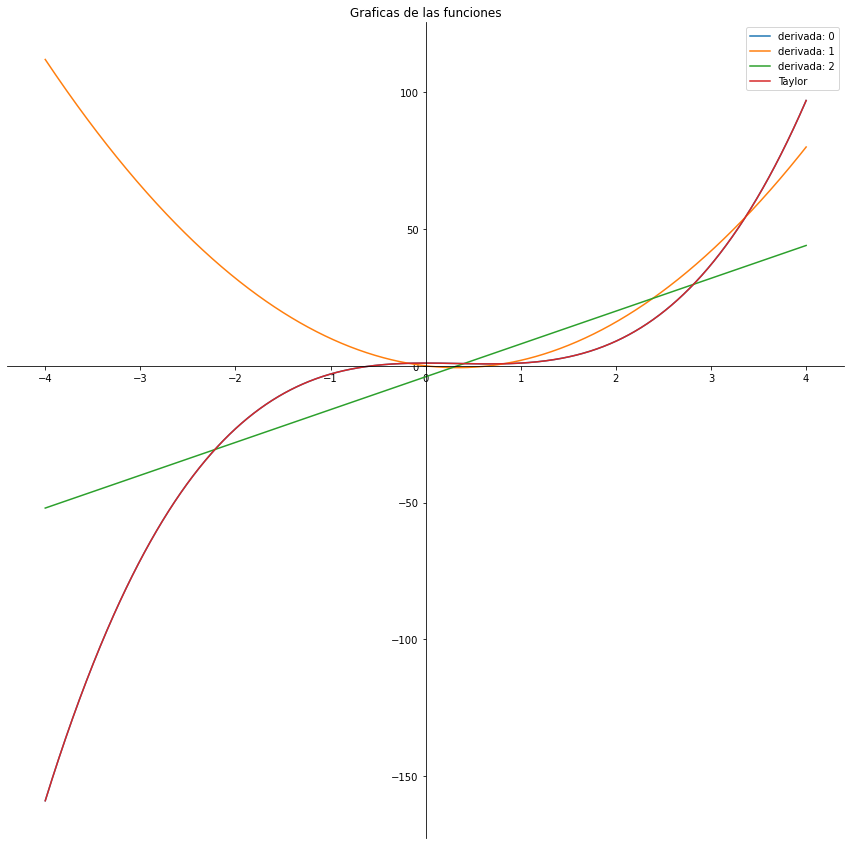

In [8]:
plt.rcParams['figure.figsize'] = [15, 15]
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
for i in range(0, len(numpy_func) - 1):
    plt.plot(x, numpy_func[i](x), label='derivada: ' + str(i))
plt.plot(x, evaltaylor(x), label='Taylor')
plt.title("Graficas de las funciones")
plt.legend(loc='best')
plt.show()